**PROJECT OBJECTIVE: The objective, as a data scientist hired by the telecom company, is to build a model that will help to identify the**
**potential customers who have a higher probability to churn. This will help the company to understand the pain points and patterns of customer**
**churn and will increase the focus on strategising customer retention.**

**import necessary libraries like numpy,pandas,seaborn,matplotlib,sklearn(model_selection,metrics),scipy**

In [116]:
#from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from scipy.stats import iqr
%matplotlib inline
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

**• STEPS AND TASK [60 Marks]:**<br>
**1. Data Understanding & Exploration: [5 Marks]**<br>
**1A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]**<br>

In [117]:
teldata1=pd.read_csv('TelcomCustomer-Churn_1.csv')
teldata1.head()
teldata1.shape

(7043, 10)

**1B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]**

In [118]:
teldata2=pd.read_csv('TelcomCustomer-Churn_2.csv')
teldata2.head()
teldata2.shape

(7043, 12)

**1C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]**

In [119]:
teldata=teldata1.merge(teldata2,how='inner',on='customerID')
teldata.head()
teldata.shape

(7043, 21)

**1D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]**

In [120]:
print(set(teldata1.columns)==set(teldata1.columns).intersection(set(teldata.columns)))
print(set(teldata2.columns)==set(teldata2.columns).intersection(set(teldata.columns)))
                                                             

True
True


**2. Data Cleaning & Analysis: [15 Marks]**

**2A. Impute missing/unexpected values in the DataFrame. [2 Marks]**

In [121]:
teldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [122]:
for i in range(1,21,1):
    print(teldata.columns[i]+":",teldata[teldata.columns[i]].unique())
    

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

**2B. Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
[For Example: MonthlyCharges, TotalCharges]**

**TotalCharges columns is in object type, so converting it to float64 type**

In [123]:
#teldata['TotalCharges']=teldata['TotalCharges'].astype('float64')
#teldata.info()
teldatatemp=teldata[teldata['TotalCharges']!=' ']
teldatatemp['TotalCharges']=teldatatemp['TotalCharges'].astype('float64')
teldatatemp['TotalCharges'].median()
teldata.loc[teldata['TotalCharges']==' ','TotalCharges']=teldatatemp['TotalCharges'].median()
teldata[teldata['TotalCharges']==' ']
teldata['TotalCharges']=teldata['TotalCharges'].astype('float64')

#teldatatemp
#teldata['TotalCharges'].median()

C:\Users\prasa\AppData\Local\Temp\ipykernel_3236\1195485622.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teldatatemp['TotalCharges']=teldatatemp['TotalCharges'].astype('float64')


**2C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical**
**features. Clearly show percentage**
**distribution in the pie-chart. [4 Marks]**

In [124]:
def displayPiecharts(df):
    for col in df.columns:
        print(col)
        print(type(col))
        if df[col].dtype=="object" and col!='customerID':
            print("in if")
            palette_color = sns.color_palette('bright')
            data=teldata[col].value_counts()
            plt.pie(data.values,labels=data.index, colors=palette_color, autopct='%.0f%%')
            plt.show()
            


customerID
<class 'str'>
gender
<class 'str'>
in if


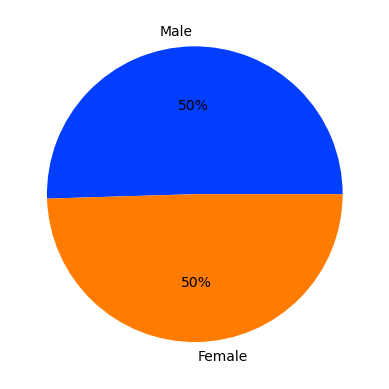

SeniorCitizen
<class 'str'>
Partner
<class 'str'>
in if


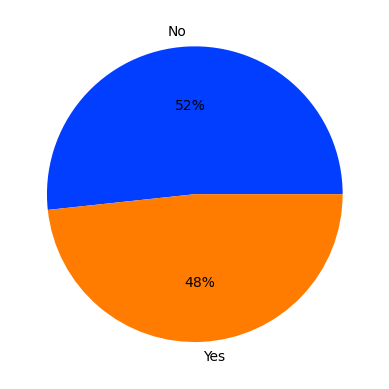

Dependents
<class 'str'>
in if


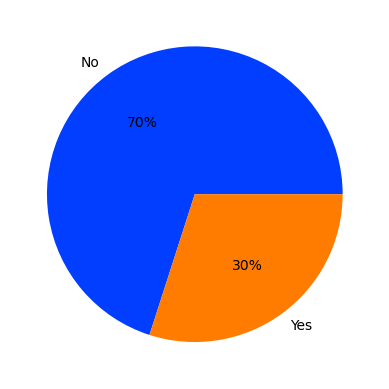

tenure
<class 'str'>
PhoneService
<class 'str'>
in if


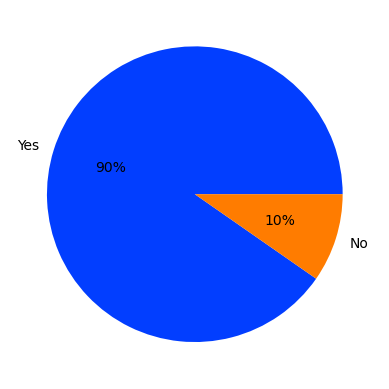

MultipleLines
<class 'str'>
in if


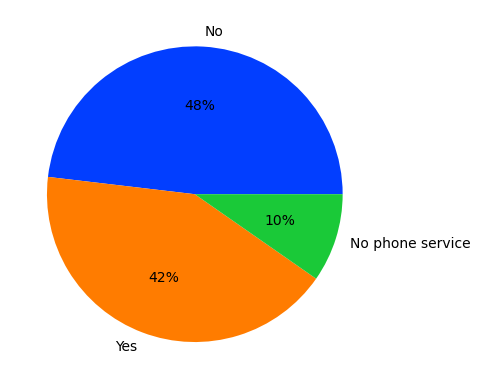

InternetService
<class 'str'>
in if


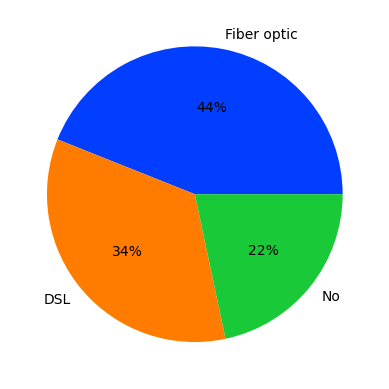

OnlineSecurity
<class 'str'>
in if


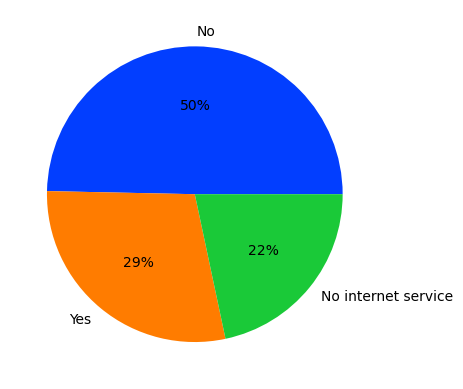

OnlineBackup
<class 'str'>
in if


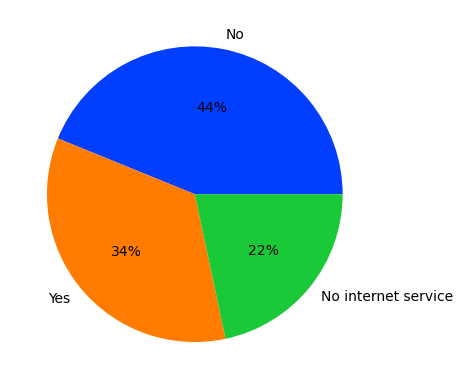

DeviceProtection
<class 'str'>
in if


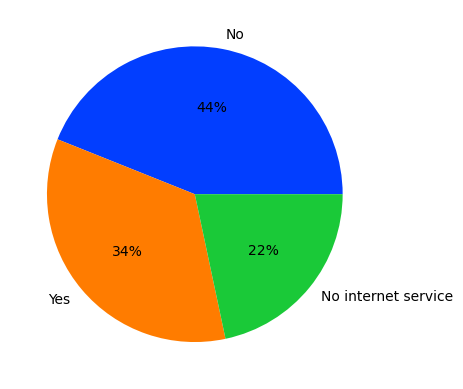

TechSupport
<class 'str'>
in if


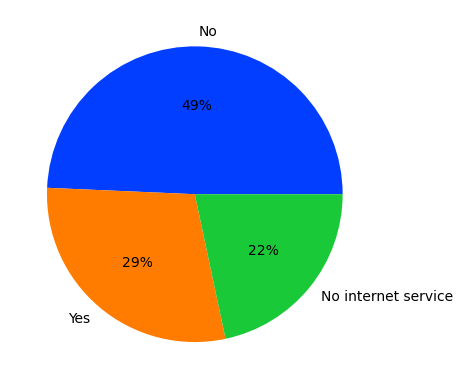

StreamingTV
<class 'str'>
in if


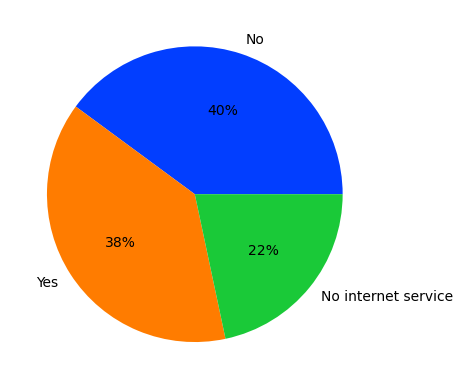

StreamingMovies
<class 'str'>
in if


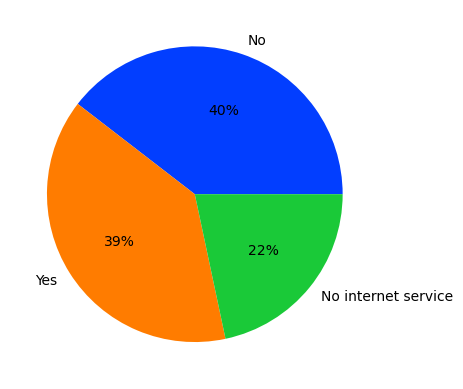

Contract
<class 'str'>
in if


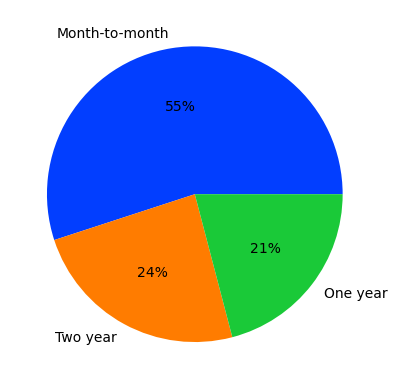

PaperlessBilling
<class 'str'>
in if


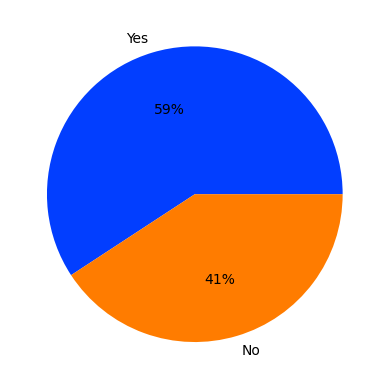

PaymentMethod
<class 'str'>
in if


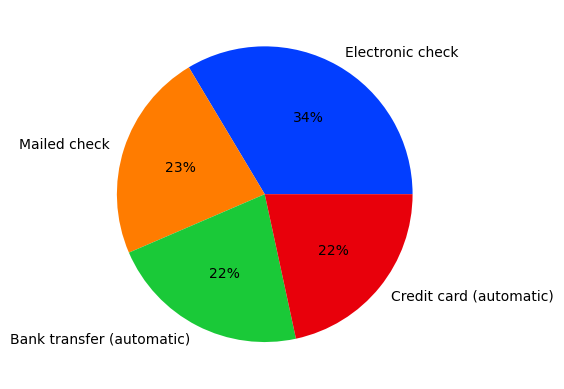

MonthlyCharges
<class 'str'>
TotalCharges
<class 'str'>
Churn
<class 'str'>
in if


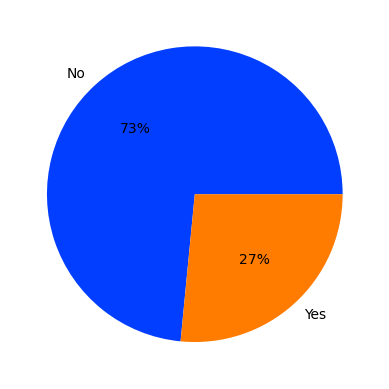

In [125]:
displayPiecharts(teldata)


**2D. Share insights for Q2.c. [2 Marks]**

**2.E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]**

**Going for One-hot encoding as most of the categorical columns have non-ordered classes**

In [126]:
lst=[]
#teldata.info()
for col in teldata.columns:
    if teldata[col].dtype=='object' and col!='Churn' and col!='customerID':
        lst.append(col)
        teldata[col] = pd.Categorical(teldata[col])
lst=[]
for col in teldata.columns:
    if teldata[col].dtype=='category' and col!='Churn' and col!='customerID':
        lst.append(col)
        #print(teldata[col].value_counts())
#teldata.info()

# #lst
df_dummies= pd.get_dummies(teldata, columns=lst,dtype='int') #This function does One-Hot-Encoding on categorical text
df_dummies.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


**Convert Churn column of True,False values into 1,0**

In [127]:
replaceStruct = {
                
                "Churn":     {"No": 0, "Yes": 1 } 
                    }

In [128]:
df_dummies=df_dummies.replace(replaceStruct)
df_dummies.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [129]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   float64
 5   Churn                                    7043 non-null   int64  
 6   gender_Female                            7043 non-null   int32  
 7   gender_Male                              7043 non-null   int32  
 8   Partner_No                               7043 non-null   int32  
 9   Partner_Yes                              7043 non-null   int32  
 10  Dependents_No                            7043 no

**2F. Split the data into 80% train and 20% test. [1 Marks]**

In [134]:
X = df_dummies.drop(['Churn','customerID'], axis=1)
y = df_dummies['Churn']

In [135]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

<br>**2G. Normalize/Standardize the data with the best suitable approach. [2 Marks]**
<br>**Using Minmax Scaler to normalize the Monthly charges,Total charges and tenure**

In [130]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler()

minmax_scale

MinMaxScaler()

In [131]:
df_dummies['MonthlyCharges_MinMaxScale'] = minmax_scale.fit_transform(df_dummies[['MonthlyCharges']])
df_dummies['TotalCharges_MinMaxScale'] = minmax_scale.fit_transform(df_dummies[['TotalCharges']])
df_dummies['tenure_MinMaxScale'] = minmax_scale.fit_transform(df_dummies[['tenure']])

In [132]:
df_dummies['MonthlyCharges_MinMaxScale'].min(),df_dummies['MonthlyCharges_MinMaxScale'].max()
df_dummies['TotalCharges_MinMaxScale'].min()
df_dummies['tenure_MinMaxScale'].min()

0.0

In [133]:
df_dummies['MonthlyCharges_MinMaxScale'].head()
df_dummies['TotalCharges_MinMaxScale'].head()
df_dummies['tenure_MinMaxScale'].head()

0    0.013889
1    0.472222
2    0.027778
3    0.625000
4    0.027778
Name: tenure_MinMaxScale, dtype: float64

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [136]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [137]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

<br>**3. Model building and performance improvement : [40 Marks]**
<br>**3A. Train a model using Decision tree and check the performance of the model on train and test data ( 4 marks )**

In [138]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Visualize decision tree**

In [139]:
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image

train_char_label = ['No', 'Yes']
Churn_Tree_File = open(r'C:\Users\prasa\OneDrive\Desktop\GreatLearning\EnsembleTechniques\Week2\Churn_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=Churn_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Churn_Tree_File.close()

retCode = system("dot -Tpng Churn_tree.dot -o Churn_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("Churn_tree.png"))

system command returning error: 1


**Score**

In [140]:
print("Performance on training data:"+str(dTree.score(X_train, y_train)))
print("Performance on testing data:"+str(dTree.score(X_test, y_test)))
acc_DT=dTree.score(X_test, y_test)

Performance on training data:0.9980475683351083
Performance on testing data:0.7324343506032647


In [141]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.732434


**Importance of features**

In [142]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                              Imp
SeniorCitizen                            0.019756
tenure                                   0.053239
MonthlyCharges                           0.092808
TotalCharges                             0.121728
gender_Female                            0.023266
gender_Male                              0.013066
Partner_No                               0.013778
Partner_Yes                              0.009985
Dependents_No                            0.008182
Dependents_Yes                           0.007375
PhoneService_No                          0.003016
PhoneService_Yes                         0.000000
MultipleLines_No                         0.009392
MultipleLines_No phone service           0.000000
MultipleLines_Yes                        0.004670
InternetService_DSL                      0.000000
InternetService_Fiber optic              0.049487
InternetService_No                       0.000000
OnlineSecurity_No                        0.012717


In [143]:
def getBestAlgo4mGriidSearch(model):
    # Choose the type of classifier. 
    #bagging_estimator_tuned = BaggingClassifier(random_state=1)

    # Grid of parameters to choose from
    ## add from article
    parameters = {'max_samples': [0.7,0.8,0.9,1], 
                  'max_features': [0.7,0.8,0.9,1],
                  'n_estimators' : [10,20,30,40,50,100],
                 }

    # Type of scoring used to compare parameter combinations
    acc_scorer = metrics.make_scorer(metrics.recall_score)

    # Run the grid search
    grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer,cv=5)
    grid_obj = grid_obj.fit(X_train, y_train)

    # Set the clf to the best combination of parameters
    model = grid_obj.best_estimator_

    # Fit the best algorithm to the data.
    return model.fit(X_train, y_train)

**3B. Use grid search and improve the performance of the Decision tree model , check the performance of the model on train**
**and test data , provide the**
**differences observed in performance in Q3.a and Q3.b ( 5 marks )**

In [151]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [3,5,10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dTreetuned = DecisionTreeClassifier(criterion = 'gini', random_state=1) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dTreetuned, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
dTreetuned = grid_search.best_estimator_ # Get the best estimator from the grid search
#y_pred = best_dtree.predict(X_test)
bestscore = best_dtree.score(X_test, y_test)
best_params = grid_search.best_params_
# Fit the best algorithm to the data.
dTreetuned.fit(X_train, y_train)
print(f"Best parameters: {best_params}")
print(f"Best Score: {bestscore}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7963094393186657


**3C. Train a model using Random forest and check the performance of the model on train and test data ( 4 marks )**

In [152]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(n_estimators = 100,random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [153]:
pred_RF = rf_estimator.predict(X_test)
pred_y= rf_estimator.predict(X_train)
acc_RF = accuracy_score(y_test, pred_RF)
print("Performance on training data:"+str(accuracy_score(y_train,pred_y)))
print("Performance on testing data:"+str(acc_RF))

Performance on training data:0.9980475683351083
Performance on testing data:0.8069552874378992


In [154]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision Tree,0.732434
0,Random Forest,0.806955
0,Random Forest,0.806955


In [155]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  0.9980475683351083
Accuracy on test set :  0.8069552874378992
Recall on training set :  0.9953977646285339
Recall on test set :  0.5431034482758621
Precision on training set :  0.997364953886693
Precision on test set :  0.6258278145695364


**3D. Use grid search and improve the performance of the Random forest model , check the performance of the model on** 
**train and test data , provide the differences observed in performance in Q3.c and Q3.d ( 5 marks )**

In [156]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

KeyboardInterrupt: 

In [38]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9882854100106496
Accuracy on test set :  0.8062455642299503
Recall on training set :  0.965154503616042
Recall on test set :  0.5488505747126436
Precision on training set :  0.9912221471978393
Precision on test set :  0.6221498371335505


**4E. Train a model using Adaboost and check the performance of the model on train and test data ( 4 marks )**

In [41]:

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

Performance on training data:0.792332268370607
Performance on testing data:0.7835344215755855


<Axes: >

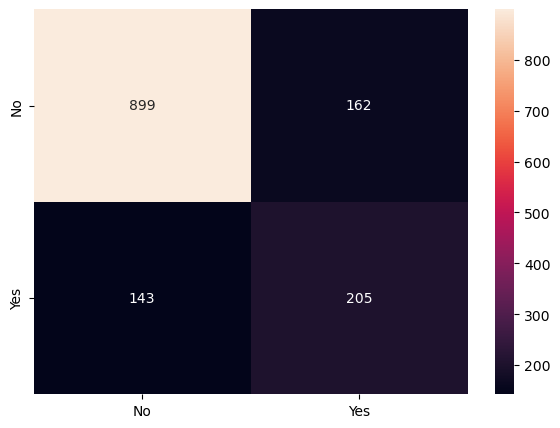

In [42]:
y_predict = abcl.predict(X_test)
print("Performance on training data:"+str(abcl.score(X_train, y_train)))
print("Performance on testing data:"+str(abcl.score(X_test, y_test)))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**3F. Use grid search and improve the performance of the Adaboost model , check the performance of the model on train and test** **data , provide the differences observed in performance in Q3.e and Q3.f ( 5 marks )**

In [46]:
# Choose the type of classifier. 
ada_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10]
}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(ada_tuned, parameters,n_jobs = -1,cv=5, verbose = 1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)
# Set the clf to the best combination of parameters
ada_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ada_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


AdaBoostClassifier(learning_rate=0.1, n_estimators=180, random_state=1)

In [47]:
#Using above defined function to get accuracy, recall and precision on train and test set
ada_tuned_score=get_metrics_score(ada_tuned)

Accuracy on training set :  0.806354277600284
Accuracy on test set :  0.8090844570617459
Recall on training set :  0.5312294543063774
Recall on test set :  0.5545977011494253
Precision on training set :  0.6812816188870152
Precision on test set :  0.6286644951140065


**3G. Train a model using GradientBoost and check the performance of the model on train and test data ( 4 marks )** 

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

Performance on training data:0.8170039048633297
Performance on testing data:0.8076650106458482


<Axes: >

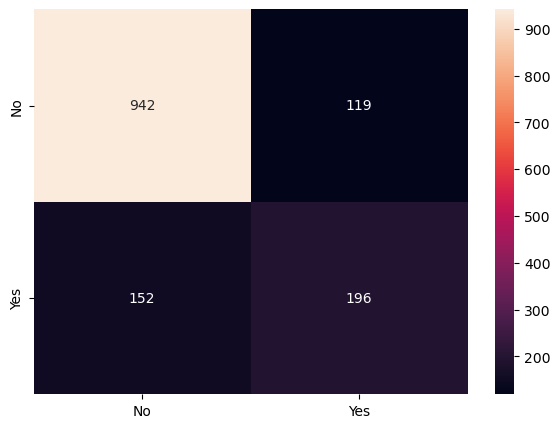

In [136]:
y_predict = gbcl.predict(X_test)

print("Performance on training data:"+str(gbcl.score(X_train, y_train)))
print("Performance on testing data:"+str(gbcl.score(X_test, y_test)))
cm=confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

**3H. Use grid search and improve the performance of the GradientBoost model , check the performance of the model on train** **and test data , provide the differences observed in performance in Q3.g and Q3.h ( 5 marks )**

In [55]:
# Choose the type of classifier. 
gradient_tuned = GradientBoostingClassifier(random_state=1)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=gradient_tuned, param_grid=param_grid, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

 
# Get the best parameters and best model
best_params = grid_obj.best_params_
best_model = grid_obj.best_estimator_

gradient_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gradient_tuned.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#Using above defined function to get accuracy, recall and precision on train and test set
gradient_tuned=get_metrics_score(gradient_tuned)

**3I. Provide detailed analysis of the below steps (4 marks ) :**

**3I(1) Compare the performance of each model in train stage and test stage**


In [141]:
print("DecisionTree:Performance on training data:"+str(dTree.score(X_train, y_train)))
print("DecisionTree:Performance on testing data:"+str(dTree.score(X_test, y_test)))
print("Random Forest:Performance on training data :"+str(accuracy_score(y_train,pred_y)))
print("Random Forest:Performance on testing data:"+str(acc_RF))
print("Adaboost:Performance on training data:"+str(abcl.score(X_train, y_train)))
print("Adaboost:Performance on testing data:"+str(abcl.score(X_test, y_test)))
print("GradientBoost:Performance on training data:"+str(gbcl.score(X_train, y_train)))
print("GradientBoost:Performance on testing data:"+str(gbcl.score(X_test, y_test)))

DecisionTree:Performance on training data:0.9980475683351083
DecisionTree:Performance on testing data:0.7324343506032647
Random Forest:Performance on training data :0.9980475683351083
Random Forest:Performance on testing data:0.8069552874378992
Adaboost:Performance on training data:0.792332268370607
Adaboost:Performance on testing data:0.7835344215755855
GradientBoost:Performance on training data:0.8170039048633297
GradientBoost:Performance on testing data:0.8076650106458482


**3I(2) Provide your observation on which model performed the best**


In [115]:
# defining list of models
models = [dTree,dTreetuned,abcl,ada_tuned,rf_estimator,rf_estimator_tuned,gbcl,
          gradient_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

**3I(3) Provide your reasoning on why the model performed best**


**3I(4) Provide your final conclusion on your observation**